<a href="https://colab.research.google.com/github/ronsupreme/BaiTH3/blob/main/BAI_TH3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [47]:
DATA_PATH = "/content/drive/MyDrive/yalefaces"

def load_yale_dataset(base_path):

    # Đọc dữ liệu huấn luyện
    X_train = []
    y_train = []
    img_shape = None

    # Lặp qua các thư mục person
    for person_dir in sorted(os.listdir(base_path)):
        if not person_dir.startswith('person-'):
            continue

        person_path = os.path.join(base_path, person_dir)
        if not os.path.isdir(person_path):
            continue

        # Lặp qua các file ảnh biểu cảm
        for expr_file in os.listdir(person_path):
            if  expr_file.endswith('.pgm'):
                continue

            img_path = os.path.join(person_path, expr_file)
            try:
                with Image.open(img_path) as img:
                    img_gray = img.convert('L')
                    img_array = np.array(img_gray, dtype=np.float32)

                    if img_shape is None:
                        img_shape = img_array.shape
                        print(f"  - Kích thước ảnh: {img_shape}")

                    X_train.append(img_array.flatten())
                    y_train.append(person_dir)  # Nhãn là 'person-X'
            except Exception as e:
                print(f" Lỗi đọc {img_path}: {str(e)}")

    # Đọc dữ liệu kiểm tra
    X_test = []
    y_test = []
    test_path = os.path.join(base_path, 'test')

    if os.path.exists(test_path):
        for test_file in os.listdir(test_path):
            if  test_file.endswith('.pgm'):
                continue

            # Trích xuất person từ tên file
            person_id = test_file.split('.')[0]
            img_path = os.path.join(test_path, test_file)

            try:
                with Image.open(img_path) as img:
                    img_gray = img.convert('L')
                    img_array = np.array(img_gray, dtype=np.float32)
                    X_test.append(img_array.flatten())
                    y_test.append(person_id)
            except Exception as e:
                print(f"Lỗi đọc test {img_path}: {str(e)}")

    print(f"- Train: {len(X_train)} ảnh từ {len(set(y_train))} người")
    print(f"- Test: {len(X_test)} ảnh")

    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test), img_shape

#### Assignment 1 (4 scores): Implement PCA using Numpy.

In [48]:
def perform_pca(X_train, n_components=20):
    mean = np.mean(X_train, axis=0)
    X_centered = X_train - mean
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    return Vt[:n_components], mean, S

#### Assignment 2 (4 scores):
- Reading the training images.
- Approximating the Principle Space having **20 dimensions**.
- Visualize the base of this Principle Space.

In [49]:
def evaluate_model(X_train, X_test, y_train, y_test, eigenfaces, mean):
    # Chiếu dữ liệu
    X_train_pca = (X_train - mean) @ eigenfaces.T
    X_test_pca = (X_test - mean) @ eigenfaces.T

    # KNN (k=1)
    distances = cdist(X_test_pca, X_train_pca, 'euclidean')
    pred_indices = np.argmin(distances, axis=1)
    pred_labels = y_train[pred_indices]

    accuracy = np.mean(pred_labels == y_test)
    return accuracy, pred_labels

In [50]:
def plot_eigenfaces(eigenfaces, img_shape, n=20):
    plt.figure(figsize=(15, 8))
    for i in range(min(n, len(eigenfaces))):
        plt.subplot(4, 5, i+1)
        eigenface = eigenfaces[i].reshape(img_shape)
        plt.imshow(eigenface, cmap='gray')
        plt.title(f"PC {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

#### Assignment 3 (2 scores):
- Assign persons to the face images in testing data.
- Evaluate the accuracy of this face recognition system.

In [51]:
def plot_results(X_test, y_test, pred_labels, img_shape, n=5):
    plt.figure(figsize=(15, 3))
    for i in range(min(n, len(X_test))):
        plt.subplot(1, n, i+1)
        plt.imshow(X_test[i].reshape(img_shape), cmap='gray')
        plt.title(f"Thực: {y_test[i]}\nDự: {pred_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

YALE DATASET
  - Kích thước ảnh: (243, 320)
- Train: 150 ảnh từ 15 người
- Test: 15 ảnh

 Đang thực hiện PCA...

 Eigenfaces:


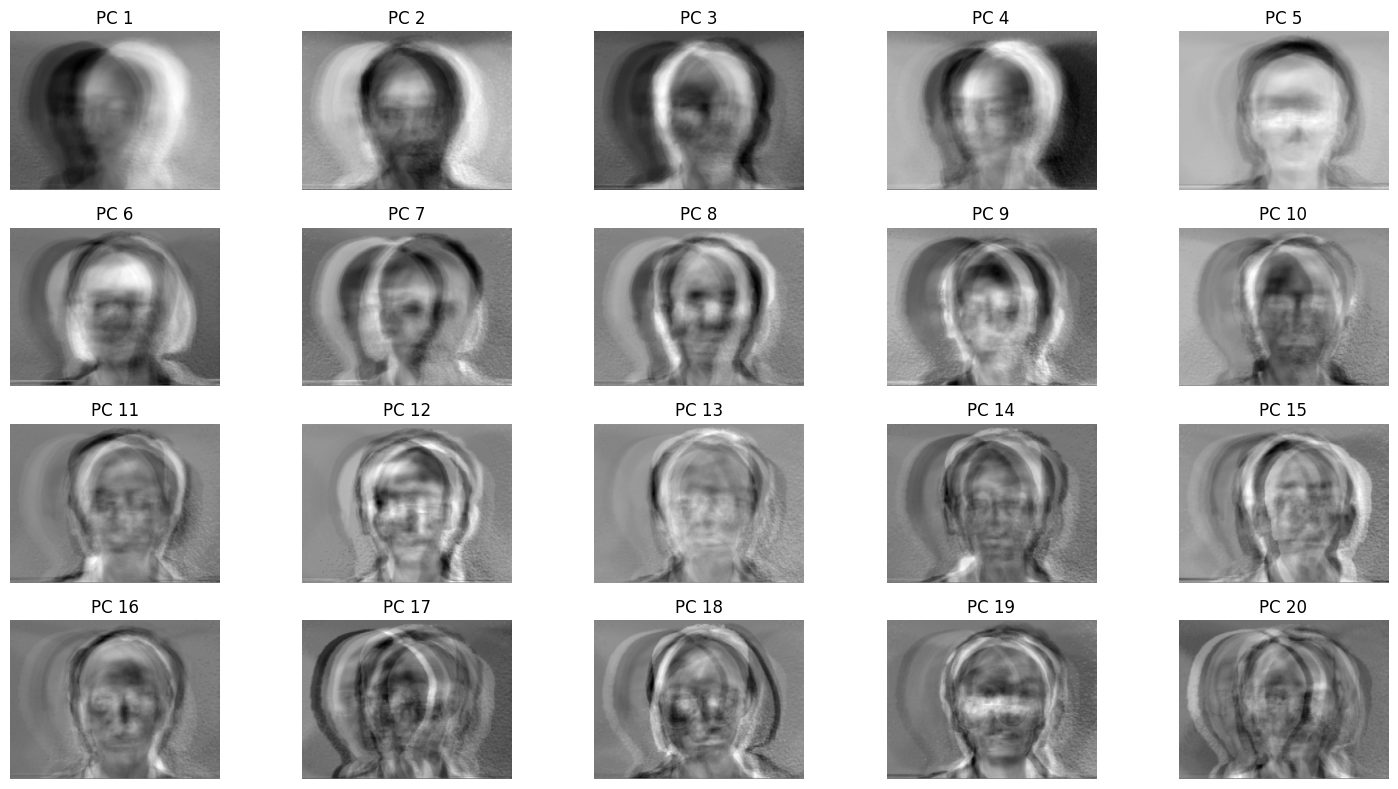


 Độ chính xác: 80.00%

 Kết quả dự đoán:


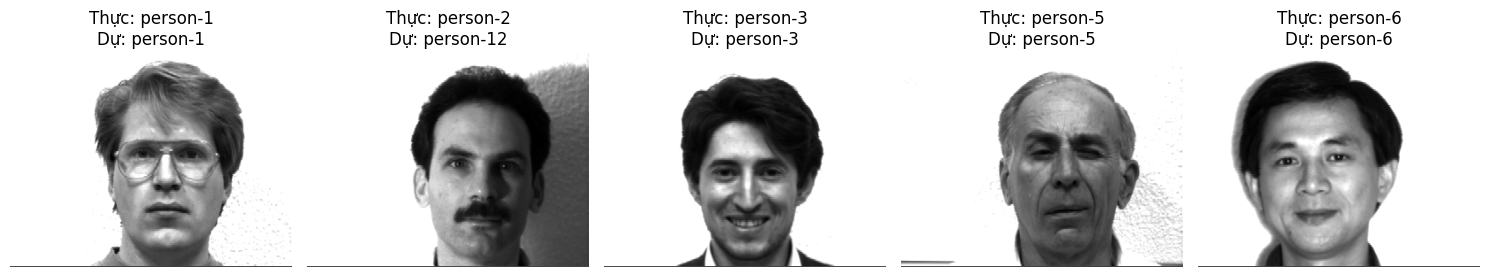

In [52]:
def main():
    # 1. Đọc dữ liệu
    X_train, X_test, y_train, y_test, img_shape = load_yale_dataset(DATA_PATH)

    # 2. Thực hiện PCA
    print("\n Đang thực hiện PCA...")
    eigenfaces, mean, S = perform_pca(X_train)

    # 3. Hiển thị eigenfaces
    print("\n Eigenfaces:")
    plot_eigenfaces(eigenfaces, img_shape)

    # 4. Đánh giá
    accuracy, pred_labels = evaluate_model(X_train, X_test, y_train, y_test, eigenfaces, mean)
    print(f"\n Độ chính xác: {accuracy*100:.2f}%")

    # 5. Hiển thị kết quả
    print("\n Kết quả dự đoán:")
    plot_results(X_test, y_test, pred_labels, img_shape)

if __name__ == "__main__":
    print("YALE DATASET")
    main()